This code was provided to me during my data analytics course. I swapped out the content to reflect my vision for predicting wine color.

For this example I used the wine quality data set: [wine dataset] (https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/), which is about the quality of red and white wine.

From UCI Machine Learning:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.

I manually combined the two data sets into one and used it throughout this project. The data set consists of over 6,000 combines samples of white and red wine. 13 features were measured from each sample: fixed acidity, volatile acidity, citric acide, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, and color. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
wine = pd.read_csv("data/winedata.csv")

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


## Data Processing

### Features and Target

In [4]:
# take a look at the column headings

wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')

In [5]:
# this model is going to predict the color of the wine.
# drop the color column from x and gave it to y

X = wine.drop('color',axis=1)
y = wine['color']

In [6]:
# discover the unique entries in the color column

wine['color'].unique()

array(['white', 'red'], dtype=object)

In [7]:
# use LabelBinarizer to change white and red to 1 and 0
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# view the transformation of the strings
y

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [8]:
# import dependencies

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
# split the data into training and testing data before scaling
# here the test data is 20% of a full data set
# random state is often set to 42:
#https://www.independent.co.uk/life-style/history/42-answer-life-universe-and-everything-2205734.html
# the random_state will be removed in the production version

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Scaling

In [10]:
# the most common scalers are MinMaxScaler and StandardScaler

scaler = MinMaxScaler()

In [11]:
# fit

scaler.fit(X_train)

MinMaxScaler()

In [12]:
# transform

scaled_X_train = scaler.transform(X_train)

In [13]:
scaled_X_test = scaler.transform(X_test)

## Model


### Creating the Model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model = Sequential()
model.add(Dense(units=12,activation='relu',input_shape=[12,]))

# Last layer for multi-class classification of 2 colors
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

## Model Training

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
early_stop = EarlyStopping(patience=10)

In [18]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Train on 5197 samples, validate on 1300 samples
Epoch 1/300
5197/5197 [==============================] - 0s 96us/sample - loss: 0.5677 - accuracy: 0.7514 - val_loss: 0.4943 - val_accuracy: 0.7638
Epoch 2/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.4482 - accuracy: 0.7514 - val_loss: 0.3638 - val_accuracy: 0.7638
Epoch 3/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.2742 - accuracy: 0.8947 - val_loss: 0.2072 - val_accuracy: 0.9508
Epoch 4/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.1672 - accuracy: 0.9679 - val_loss: 0.1389 - val_accuracy: 0.9746
Epoch 5/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.1203 - accuracy: 0.9761 - val_loss: 0.1064 - val_accuracy: 0.9792
Epoch 6/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0974 - accuracy: 0.9786 - val_loss: 0.0879 - val_accuracy: 0.9800
Epoch 7/300
5197/5197 [==============================] - 0s 34us

Epoch 56/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0349 - accuracy: 0.9938 - val_loss: 0.0260 - val_accuracy: 0.9946
Epoch 57/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0345 - accuracy: 0.9938 - val_loss: 0.0267 - val_accuracy: 0.9938
Epoch 58/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0349 - accuracy: 0.9942 - val_loss: 0.0256 - val_accuracy: 0.9962
Epoch 59/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0343 - accuracy: 0.9944 - val_loss: 0.0255 - val_accuracy: 0.9954
Epoch 60/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0343 - accuracy: 0.9944 - val_loss: 0.0253 - val_accuracy: 0.9954
Epoch 61/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0338 - accuracy: 0.9944 - val_loss: 0.0255 - val_accuracy: 0.9954
Epoch 62/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0338 - accuracy: 0.9942

Epoch 165/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0248 - accuracy: 0.9973 - val_loss: 0.0165 - val_accuracy: 0.9969
Epoch 166/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0250 - accuracy: 0.9960 - val_loss: 0.0167 - val_accuracy: 0.9977
Epoch 167/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0246 - accuracy: 0.9967 - val_loss: 0.0166 - val_accuracy: 0.9977
Epoch 168/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0242 - accuracy: 0.9967 - val_loss: 0.0163 - val_accuracy: 0.9962
Epoch 169/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0246 - accuracy: 0.9960 - val_loss: 0.0161 - val_accuracy: 0.9969
Epoch 170/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0243 - accuracy: 0.9965 - val_loss: 0.0172 - val_accuracy: 0.9962
Epoch 171/300
5197/5197 [==============================] - 0s 37us/sample - loss: 0.0244 - accuracy:

5197/5197 [==============================] - 0s 34us/sample - loss: 0.0184 - accuracy: 0.9965 - val_loss: 0.0126 - val_accuracy: 0.9977
Epoch 274/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0185 - accuracy: 0.9967 - val_loss: 0.0125 - val_accuracy: 0.9977
Epoch 275/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0187 - accuracy: 0.9971 - val_loss: 0.0130 - val_accuracy: 0.9969
Epoch 276/300
5197/5197 [==============================] - 0s 33us/sample - loss: 0.0186 - accuracy: 0.9967 - val_loss: 0.0124 - val_accuracy: 0.9977
Epoch 277/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0185 - accuracy: 0.9967 - val_loss: 0.0131 - val_accuracy: 0.9977
Epoch 278/300
5197/5197 [==============================] - 0s 34us/sample - loss: 0.0184 - accuracy: 0.9971 - val_loss: 0.0124 - val_accuracy: 0.9969
Epoch 279/300
5197/5197 [==============================] - 0s 35us/sample - loss: 0.0184 - accuracy: 0.9967 - val_

## Model Evaluation

In [19]:
metrics = pd.DataFrame(model.history.history)

In [20]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.567689,0.751395,0.494311,0.763846
1,0.448160,0.751395,0.363825,0.763846
2,0.274158,0.894747,0.207222,0.950769
3,0.167220,0.967866,0.138907,0.974615
4,0.120307,0.976140,0.106437,0.979231
...,...,...,...,...
295,0.018033,0.996729,0.011947,0.997692
296,0.017681,0.996921,0.011956,0.997692
297,0.017481,0.996921,0.012072,0.997692
298,0.017814,0.996729,0.011998,0.997692


<AxesSubplot:>

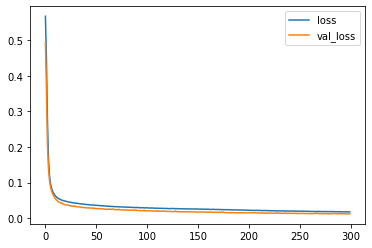

In [21]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

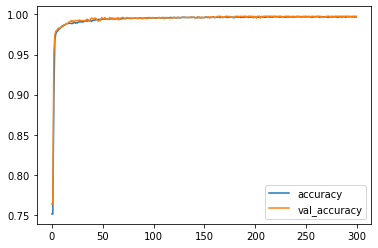

In [22]:
metrics[['accuracy','val_accuracy']].plot()

In [23]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.012471022542852622, 0.9976923]

## Ready Model for Deployment

In [24]:
epochs = len(metrics)

In [25]:
scaled_X = scaler.fit_transform(X)

In [26]:
model = Sequential()
model.add(Dense(units=12,activation='relu'))

# Last layer for multi-class classification of 2 colors
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [27]:
model.fit(scaled_X,y,epochs=epochs)

Train on 6497 samples
Epoch 1/300
6497/6497 [==============================] - 0s 64us/sample - loss: 0.5383 - accuracy: 0.7487
Epoch 2/300
6497/6497 [==============================] - 0s 32us/sample - loss: 0.3496 - accuracy: 0.8370
Epoch 3/300
6497/6497 [==============================] - 0s 29us/sample - loss: 0.1937 - accuracy: 0.9577
Epoch 4/300
6497/6497 [==============================] - 0s 29us/sample - loss: 0.1237 - accuracy: 0.9769
Epoch 5/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0935 - accuracy: 0.9809
Epoch 6/300
6497/6497 [==============================] - 0s 29us/sample - loss: 0.0783 - accuracy: 0.9826
Epoch 7/300
6497/6497 [==============================] - 0s 31us/sample - loss: 0.0689 - accuracy: 0.9840
Epoch 8/300
6497/6497 [==============================] - 0s 30us/sample - loss: 0.0627 - accuracy: 0.9852
Epoch 9/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0584 - accuracy: 0.9861
Epoch 10/300
6497/6497 [

6497/6497 [==============================] - 0s 30us/sample - loss: 0.0261 - accuracy: 0.9943
Epoch 78/300
6497/6497 [==============================] - 0s 27us/sample - loss: 0.0260 - accuracy: 0.9943
Epoch 79/300
6497/6497 [==============================] - 0s 27us/sample - loss: 0.0259 - accuracy: 0.9943
Epoch 80/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0257 - accuracy: 0.9943
Epoch 81/300
6497/6497 [==============================] - 0s 27us/sample - loss: 0.0255 - accuracy: 0.9943
Epoch 82/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0256 - accuracy: 0.9943
Epoch 83/300
6497/6497 [==============================] - 0s 27us/sample - loss: 0.0253 - accuracy: 0.9942
Epoch 84/300
6497/6497 [==============================] - 0s 27us/sample - loss: 0.0254 - accuracy: 0.9945
Epoch 85/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0250 - accuracy: 0.9948
Epoch 86/300
6497/6497 [==========================

Epoch 228/300
6497/6497 [==============================] - 0s 27us/sample - loss: 0.0148 - accuracy: 0.9966
Epoch 229/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0150 - accuracy: 0.9966
Epoch 230/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0147 - accuracy: 0.9966
Epoch 231/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0146 - accuracy: 0.9969
Epoch 232/300
6497/6497 [==============================] - 0s 27us/sample - loss: 0.0147 - accuracy: 0.9966
Epoch 233/300
6497/6497 [==============================] - 0s 27us/sample - loss: 0.0148 - accuracy: 0.9966
Epoch 234/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0146 - accuracy: 0.9966
Epoch 235/300
6497/6497 [==============================] - 0s 29us/sample - loss: 0.0147 - accuracy: 0.9966
Epoch 236/300
6497/6497 [==============================] - 0s 28us/sample - loss: 0.0143 - accuracy: 0.9971
Epoch 237/300
6497/6497 [===

In [28]:
model.save("final_wine_model.h5")

### Saving Scaler

In [29]:
import joblib

In [30]:
joblib.dump(scaler,'wine_scaler.pkl')

['wine_scaler.pkl']

## Predicting a Single New Wine Color

In [31]:
from tensorflow.keras.models import load_model

In [32]:
wine_model = load_model("final_wine_model.h5")
wine_scaler = joblib.load("wine_scaler.pkl")

In [33]:
wine.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,white


In [34]:
# white wine attributes for testing

wine_example = {'fixed_acidity':7.0,
                 'volatile_acidity':0.27,
                 'citric_acid':0.36,
                 'residual_sugar':20.7,
                 'chlorides':0.045,
                 'free_sulfur_dioxide':45.0,
                 'total_sulfur_dioxide':170.0,
                 'density':1.001,
                 'pH':3.0,
                 'sulphates':0.45,
                 'alcohol':8.8,
                 'quality':6}

In [35]:
wine_example.keys()

dict_keys(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])

In [36]:
encoder.classes_

array(['red', 'white'], dtype='<U5')

In [37]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    f_a = sample_json['fixed_acidity']
    v_a = sample_json['volatile_acidity']
    c_a = sample_json['citric_acid']
    r_s = sample_json['residual_sugar']
    chl = sample_json['chlorides']
    f_s_d = sample_json['free_sulfur_dioxide']
    t_s_d = sample_json['total_sulfur_dioxide']
    den = sample_json['density']
    ph = sample_json['pH']
    sul = sample_json['sulphates']
    alc = sample_json['alcohol']
    qua = sample_json['quality']
    
    wine = [[f_a,v_a,c_a,r_s,chl,f_s_d,t_s_d,den,ph,sul,alc,qua]]
    
    wine = scaler.transform(wine)
    
    classes = np.array(['red', 'white'])
    
    class_ind = model.predict_classes(wine)
    
    return classes[class_ind][0]
                    

In [38]:
# prediction based on "wine example" white wine inputs should predict "white"

return_prediction(wine_model,wine_scaler,wine_example)

'white'

# CODE FOR DEPLOYMENT

In [39]:
from tensorflow.keras.models import load_model
import joblib


wine_model = load_model("final_wine_model.h5")
wine_scaler = joblib.load("wine_scaler.pkl")


def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    f_a = sample_json['fixed_acidity']
    v_a = sample_json['volatile_acidity']
    c_a = sample_json['citric_acid']
    r_s = sample_json['residual_sugar']
    chl = sample_json['chlorides']
    f_s_d = sample_json['free_sulfur_dioxide']
    t_s_d = sample_json['total_sulfur_dioxide']
    den = sample_json['density']
    ph = sample_json['pH']
    sul = sample_json['sulphates']
    alc = sample_json['alcohol']
    qua = sample_json['quality']
    
    wine = [[f_a,v_a,c_a,r_s,chl,f_s_d,t_s_d,den,ph,sul,alc,qua]]
    
    wine = scaler.transform(wine)
    
    classes = np.array(['red', 'white'])
    
    class_ind = model.predict_classes(wine)
    
    return classes[class_ind][0]
    